<a href="https://colab.research.google.com/github/Urusha-Bajracharya3950/Engg680_Digital_Engineering_Project_Group_5/blob/main/Model_Development/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGG680 - Introduction to Digital Engineering**
## *GROUP PROJECT: PREDICTIVE MODEL FOR EFFICIENT WATER MANAGEMENT SYSTEM IN CANADA (CALGARY)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Gayatri | An | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |
| Member 5: | Akosua | Gyimah | AkosuaGyimah,12/09/24 | Hours | Contribution |
| Member 6: | Seyram | Atsu Quist | SeyramAtsuQuist,12/09/24 | Hours | Contribution |
| Member 7: | Joseph | Mills | JosephMills,12/09/24 | Hours | Contribution |
| Member 8: | Gideon | Asamoah | GideonAsamoah,12/09/24 | Hours | Contribution |


# **DATA VISUALIZATION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 0.1: Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Step 0.2: Load Data sets

In [3]:
water_quality_data = pd.read_csv('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Water Quality Data.csv')
historical_data = pd.read_excel('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Historical Data.xlsx')
weather_data = pd.read_csv('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Weather Data.csv')
real_time_data = pd.read_excel('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Real Time Data.xlsx')
#Display first few rows of each data set
print("Water Quality Data:")
print(water_quality_data.head())

print("Historical Data:")
print(historical_data.head())

print("Weather Data:")
print(weather_data.head())

print("Real-Time Data:")
print(real_time_data.head())

Water Quality Data:
        Date  IRON DISSOLVED  OXYGEN DISSOLVED (FIELD METER)  PH (FIELD)  \
0  1/20/2014            0.06                       13.560000    7.980000   
1  1/21/2014            0.06                       13.554627    7.978149   
2  1/22/2014            0.06                       13.542525    7.979391   
3  1/23/2014            0.06                       13.530448    7.980630   
4  1/24/2014            0.06                       13.518394    7.981867   

   TEMPERATURE WATER  TURBIDITY  ZINC DISSOLVED  Day_of_Year  Day  
0          -0.030000   3.100000        1.430000           20   20  
1          -0.202312   3.403106        1.484332           21   21  
2          -0.366397   3.667098        1.480835           22   22  
3          -0.529686   3.930075        1.477341           23   23  
4          -0.692182   4.192037        1.473849           24   24  
Historical Data:
        Date  Day_of_Year    Year  Day  \
0 2014-01-01          1.0  2014.0  1.0   
1 2014-01-02  

### 1. Creating Plots for Data Collected

Step 1.1: Visualizing Water Quality Data

--- Visualizing Water Quality Data ---


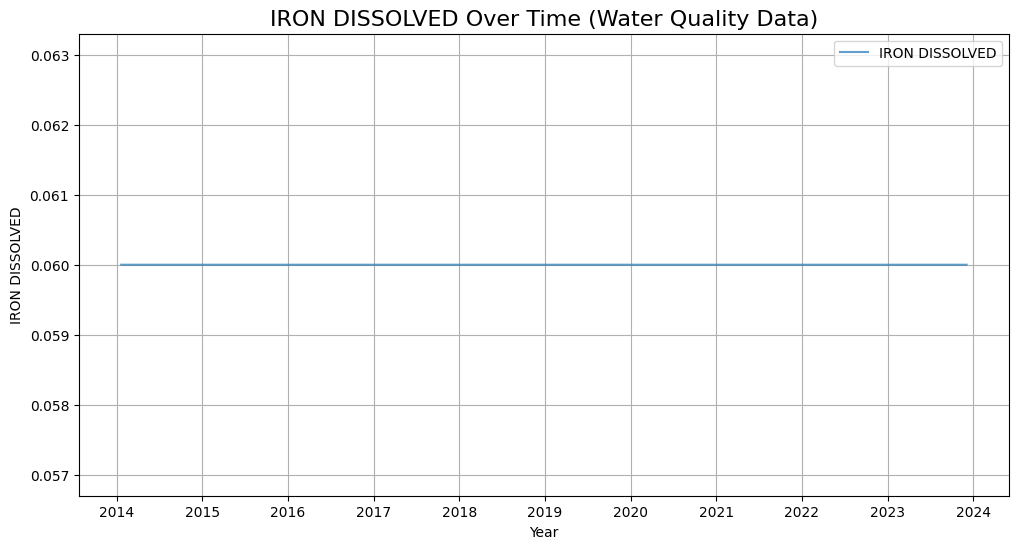

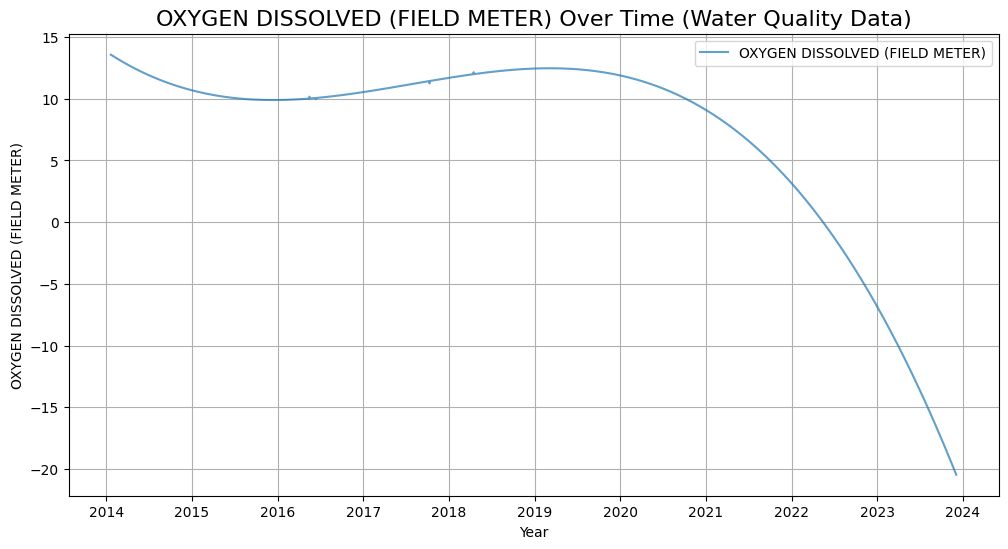

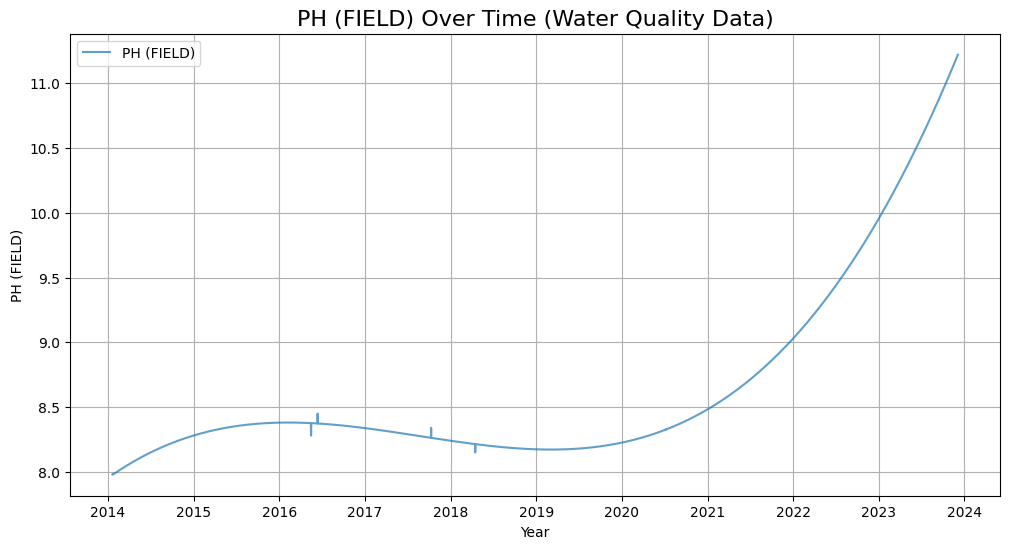

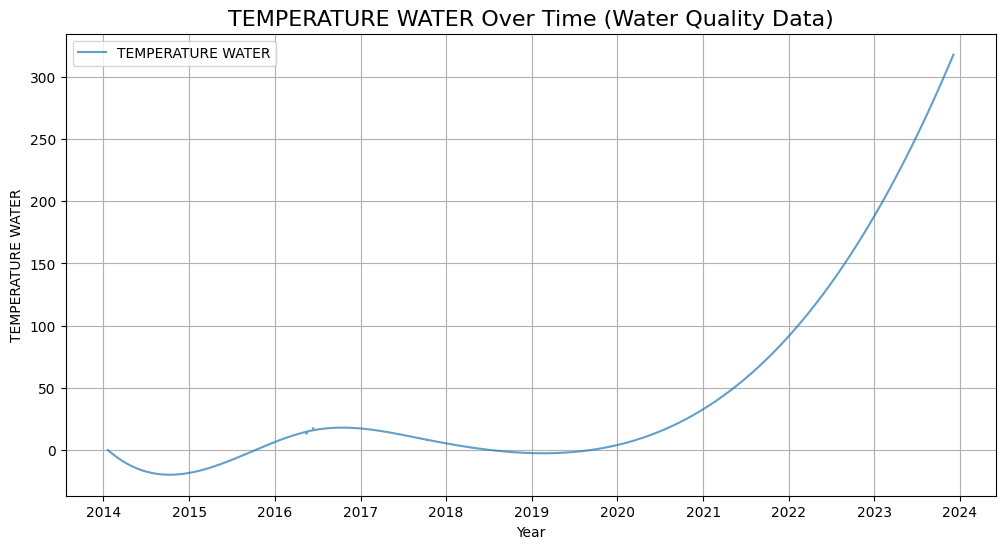

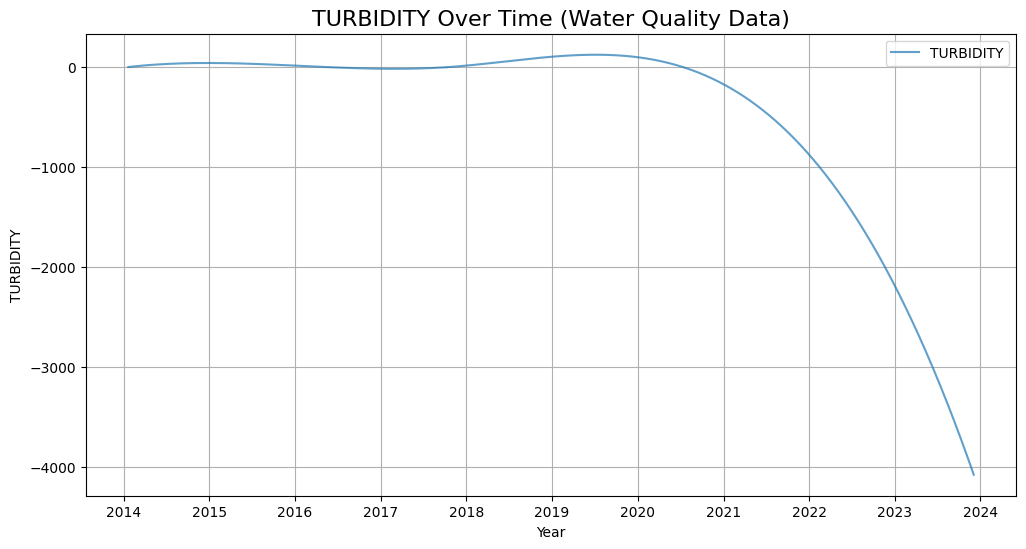

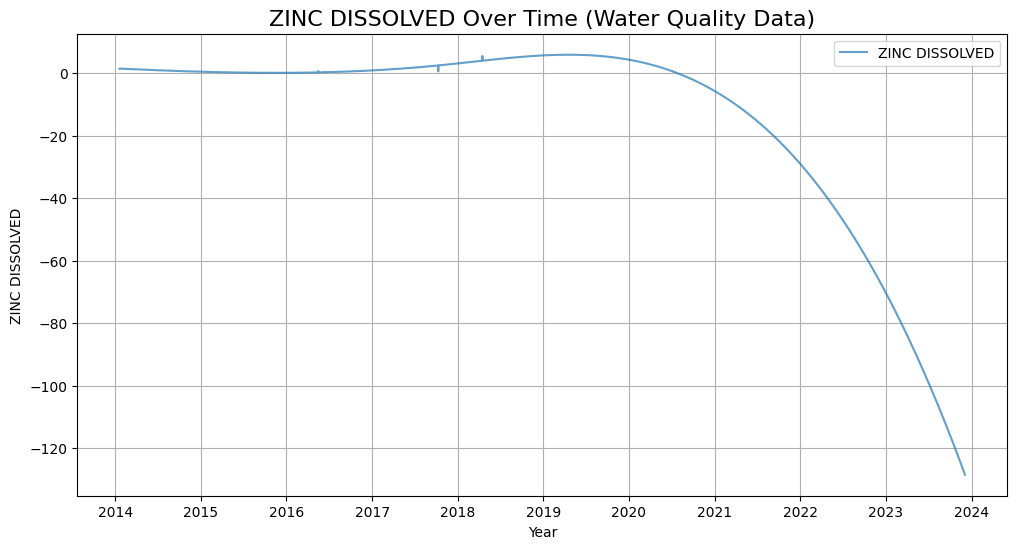

In [4]:
print("--- Visualizing Water Quality Data ---")

# Ensure 'Date' is in datetime format
water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'], errors='coerce')

# Select numeric features excluding day-related columns
water_quality_features = water_quality_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Day_of_Year', 'Day'])


# Line Plots
for feature in water_quality_features:
    plt.figure(figsize=(12, 6))
    plt.plot(water_quality_data['Date'], water_quality_data[feature], label=feature, alpha=0.7)
    plt.title(f'{feature} Over Time (Water Quality Data)', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()



Step 1.2: Visualizing Historical Data

--- Visualizing Historical Data ---


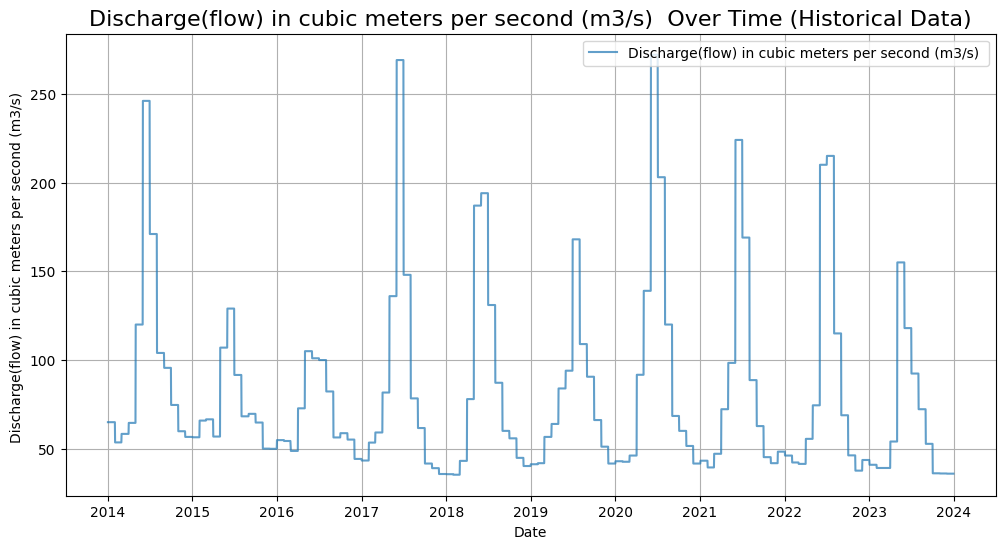

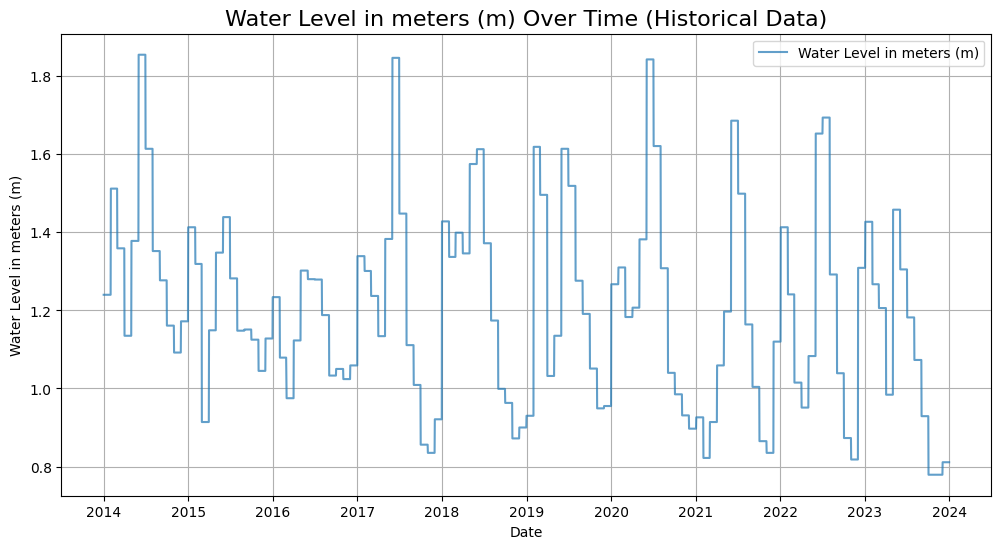

In [5]:
print("--- Visualizing Historical Data ---")

# Ensure 'Date' is in datetime format
historical_data['Date'] = pd.to_datetime(historical_data['Date'], errors='coerce')

# Select numeric features excluding 'Year', 'Day_of_Year', and 'Day'
historical_features = historical_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Year', 'Day_of_Year', 'Day'])

# Line Plots
for feature in historical_features:
    plt.figure(figsize=(12, 6))
    plt.plot(historical_data['Date'], historical_data[feature], label=feature, alpha=0.7)
    plt.title(f'{feature} Over Time (Historical Data)', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()

Step 1.3: Visualizing Weather Data

Visualizing Line Plots for Weather Data


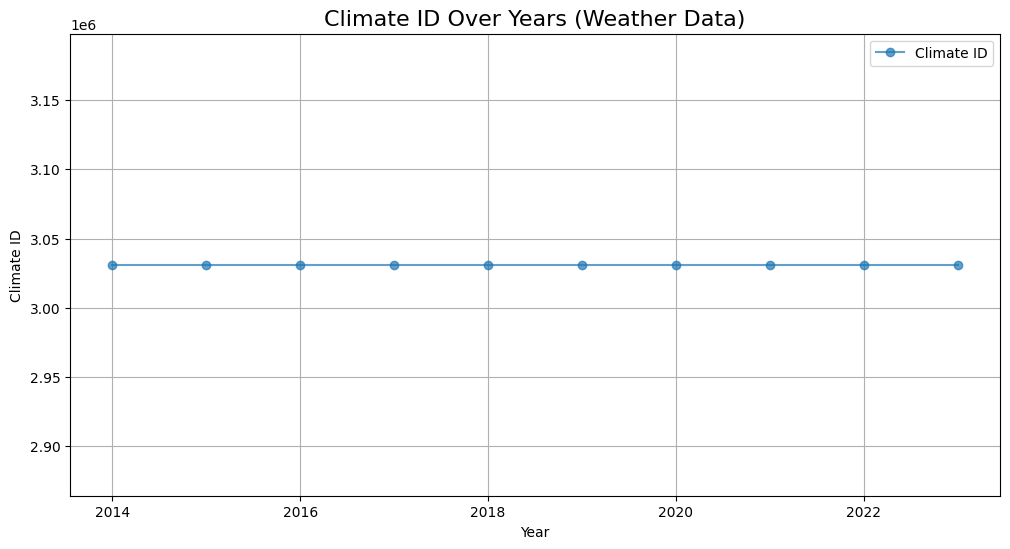

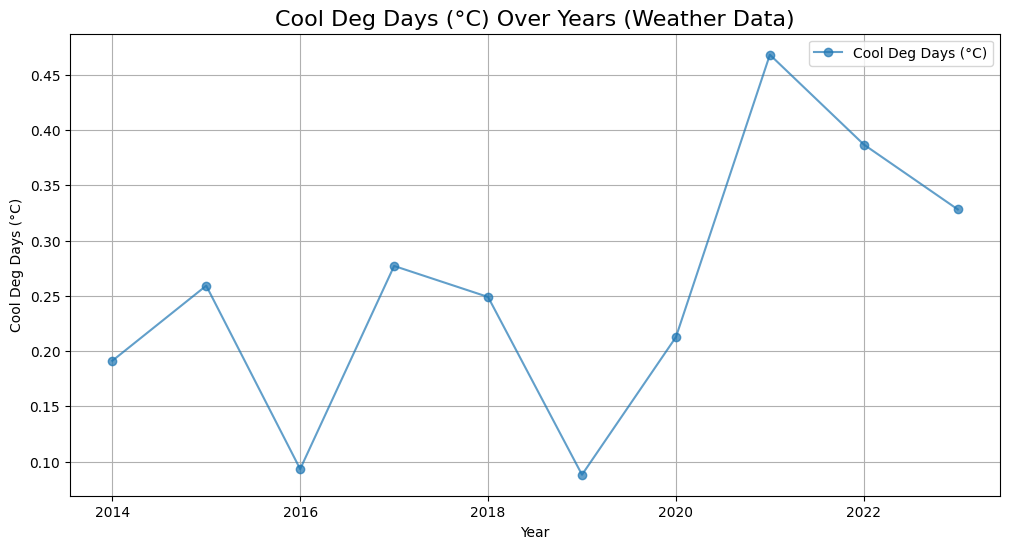

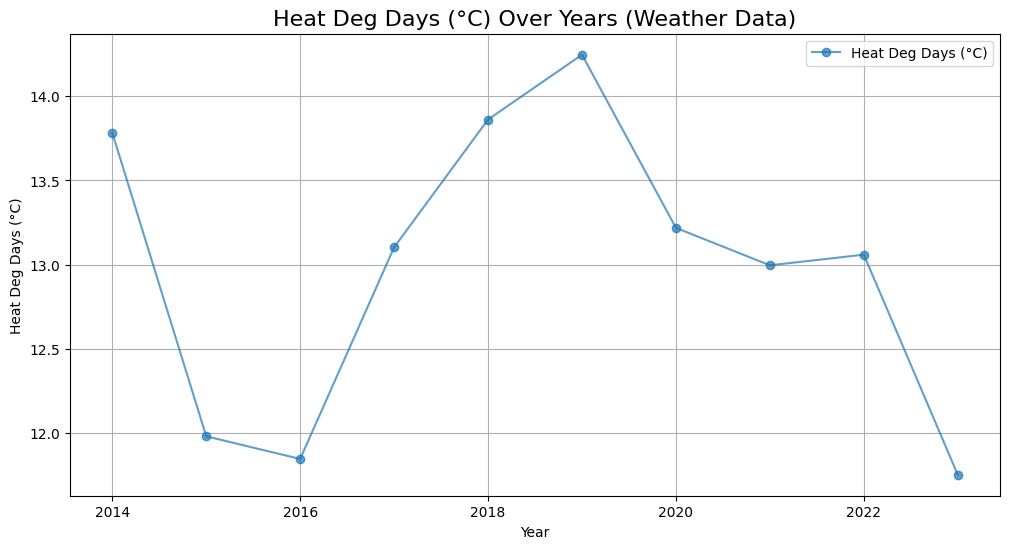

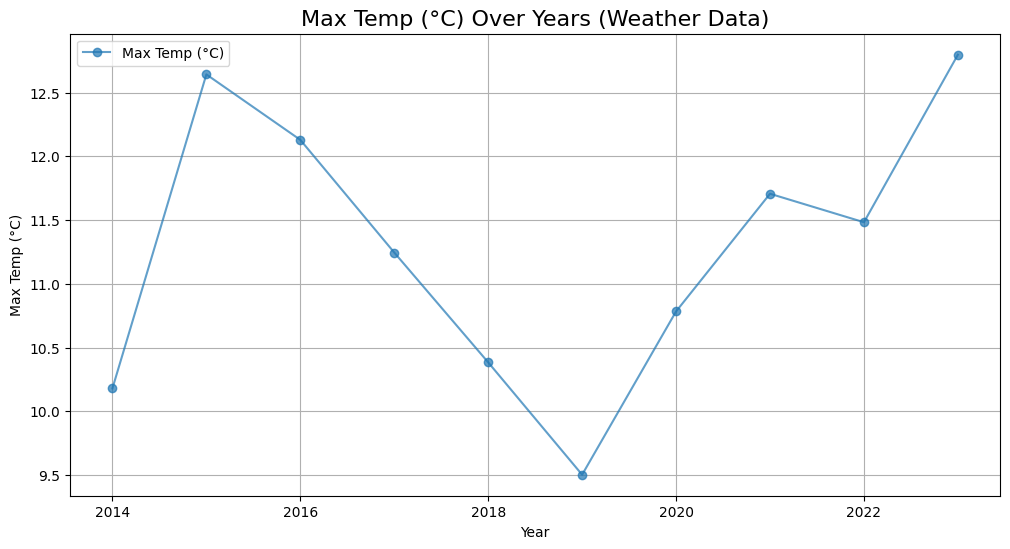

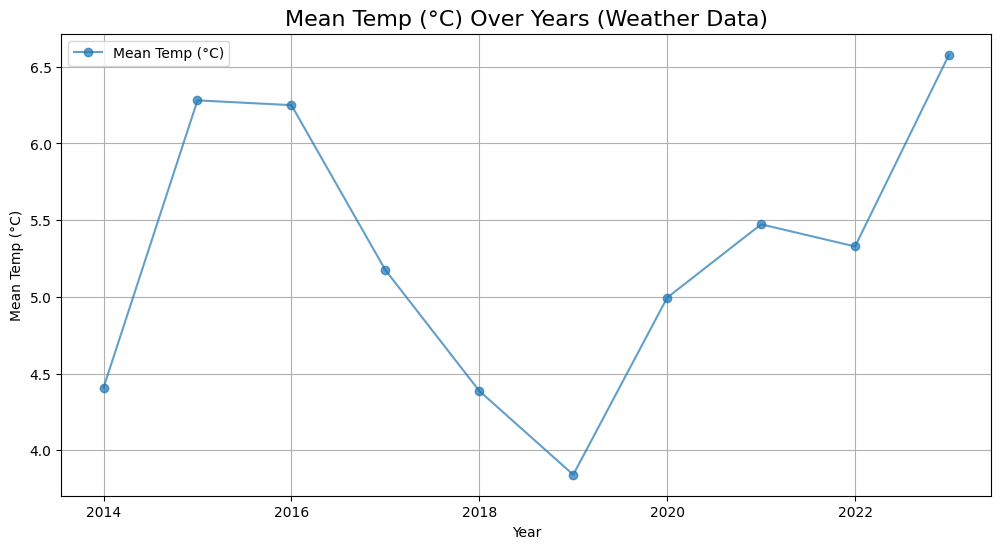

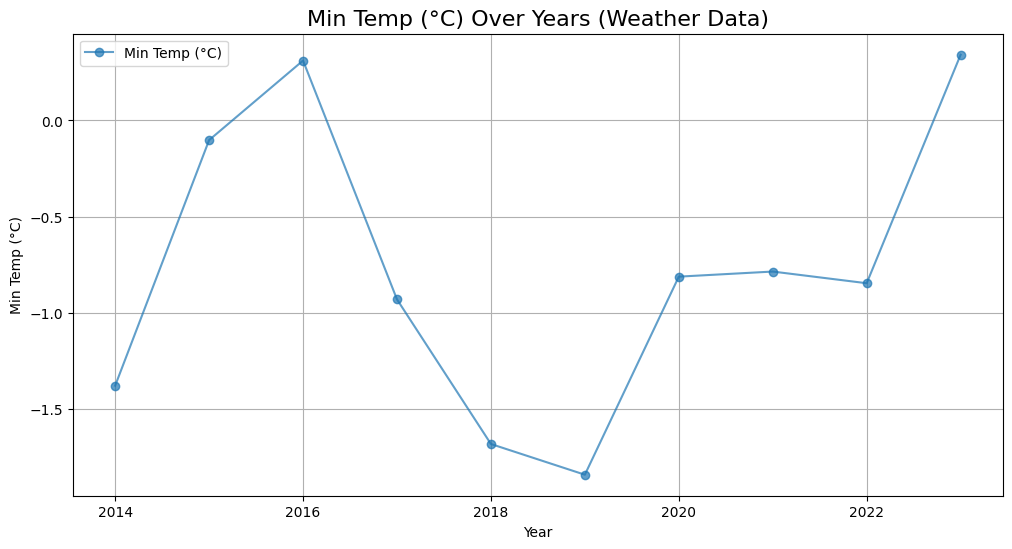

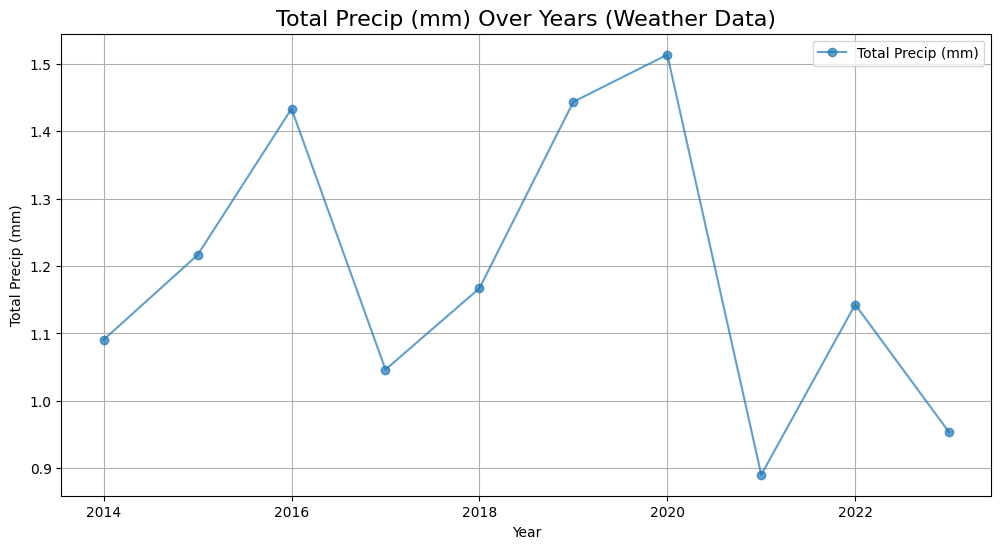

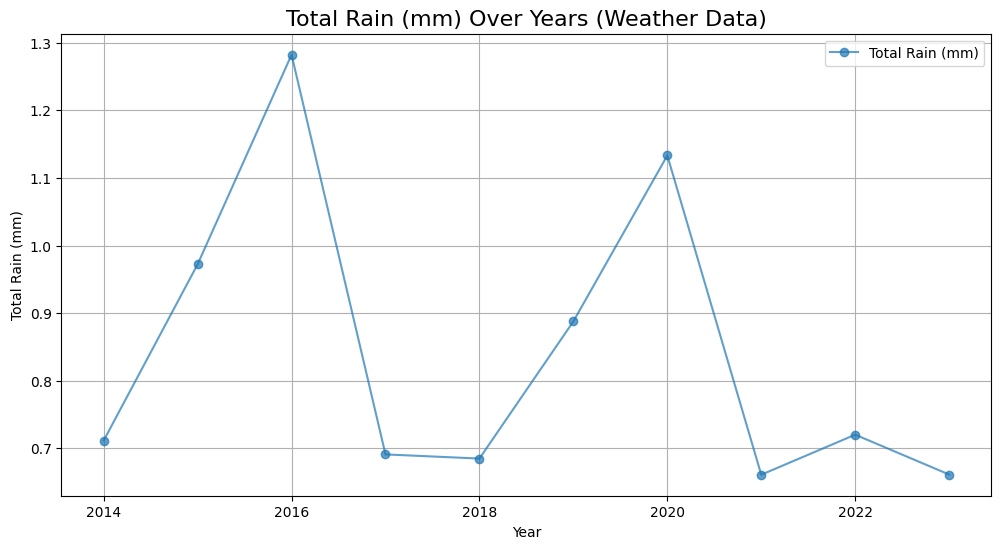

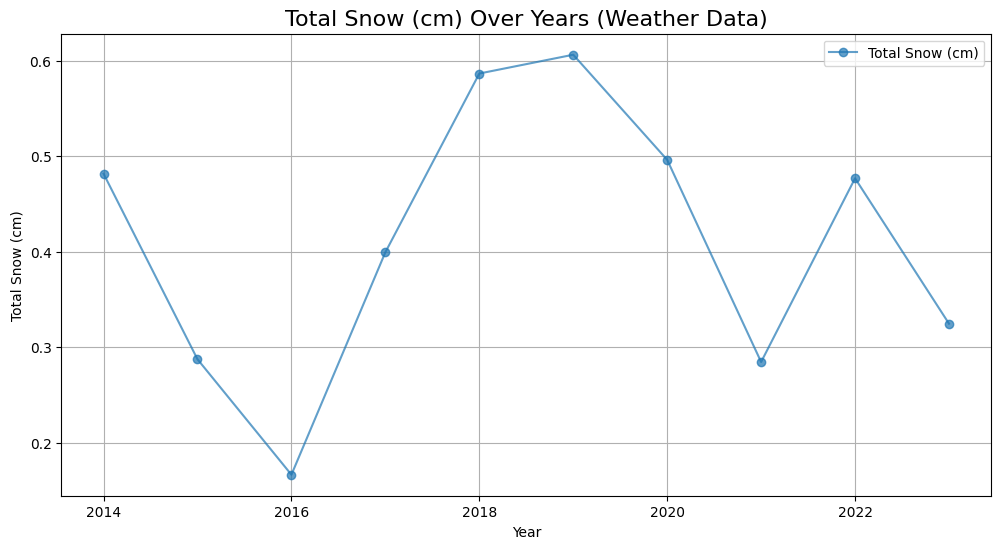

In [6]:
print("Visualizing Line Plots for Weather Data")

# Ensure 'Date' is in datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

# Extract the 'Year' from the 'Date' column
weather_data['Year'] = weather_data['Date'].dt.year

# Select numeric features excluding irrelevant columns
weather_features = weather_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Longitude (x)', 'Latitude (y)', 'Day_of_Year', 'Day'])

# Aggregate features by year using the mean
annual_data = weather_data.groupby('Year')[weather_features].mean().reset_index()

# Plot line plots for each feature against Year
for feature in weather_features:
    plt.figure(figsize=(12, 6))
    plt.plot(annual_data['Year'], annual_data[feature], label=feature, marker='o', alpha=0.7)
    plt.title(f'{feature} Over Years (Weather Data)', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.grid()
    plt.legend()
    plt.show()


Step 1.4: Visualizing Real Time Data

Visualizing Water Level and Discharge of Real-Time Data


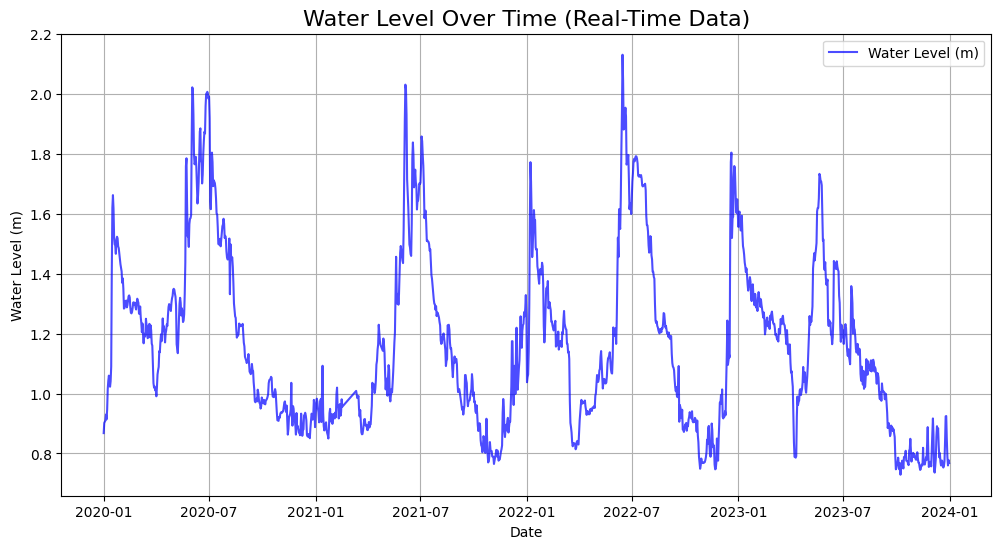

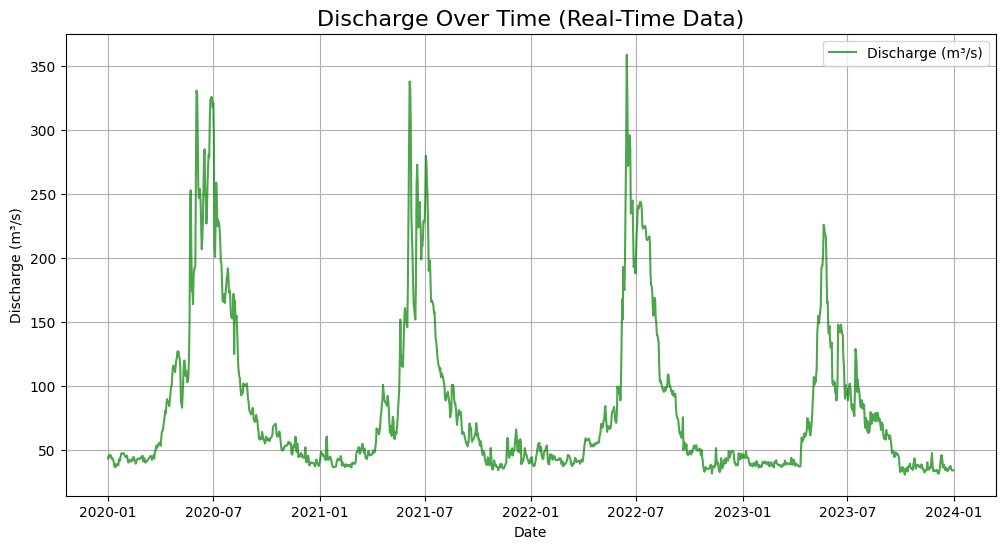

In [7]:
print("Visualizing Water Level and Discharge of Real-Time Data")

# Ensure 'Date/Time' is in datetime format
real_time_data['Date'] = pd.to_datetime(real_time_data['Date'], errors='coerce')

# Plot Water Level
plt.figure(figsize=(12, 6))
plt.plot(real_time_data['Date'], real_time_data['Water Level Daily Mean Value (m)'], label='Water Level (m)', color='blue', alpha=0.7)
plt.title('Water Level Over Time (Real-Time Data)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid()
plt.show()

# Plot Discharge
plt.figure(figsize=(12, 6))
plt.plot(real_time_data['Date'], real_time_data['Discharge Daily Mean Value (m3/s)'], label='Discharge (m³/s)', color='green', alpha=0.7)
plt.title('Discharge Over Time (Real-Time Data)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Discharge (m³/s)')
plt.legend()
plt.grid()
plt.show()

# **Model Development without Real Time Data (Part 1)**

### 2. Linear Regression Model


Step 2.1: Preprocessing: Ensure date compatibility and merge datasets

In [8]:
water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'])
historical_data['Date'] = pd.to_datetime(historical_data['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Dropping duplicate or irrelevant columns before merging
water_quality_data = water_quality_data.drop(columns=['Year', 'Day'], errors='ignore')
historical_data = historical_data.drop(columns=['Year', 'Day'], errors='ignore')
weather_data = weather_data.drop(columns=['Year', 'Day'], errors='ignore')

# Merging datasets based on 'Day_of_Year'
merged_dataset = (
    water_quality_data
    .merge(historical_data, left_on='Day_of_Year', right_on='Day_of_Year', how='inner')
    .merge(weather_data, left_on='Day_of_Year', right_on='Day_of_Year', how='inner')
)

# Target variable
target_column = "Discharge(flow) in cubic meters per second (m3/s) "

# Preparing features and target
features = merged_dataset.drop(
    columns=['Sample Date', 'Date/Time_x', 'Date/Time_y', 'Day', target_column], errors='ignore'
)
target = merged_dataset[target_column]

# Selecting only numeric features
features = features.select_dtypes(include=['float64', 'int64'])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Step 2.2: Model Training and Performance Evaluation

In [9]:
lr_model_optimized = LinearRegression()
lr_model_optimized.fit(X_train, y_train)

# Predicting on the test set
y_pred_optimized = lr_model_optimized.predict(X_test)

# Evaluating the model's performance
lr_mse_optimized = mean_squared_error(y_test, y_pred_optimized)
lr_r2_optimized = r2_score(y_test, y_pred_optimized)


# Displaying results
print('MSE = ', lr_mse_optimized)
print('R² = ', lr_r2_optimized)

MSE =  708.4168676229259
R² =  0.7357078763503719


Step 2.3: Visualising Results

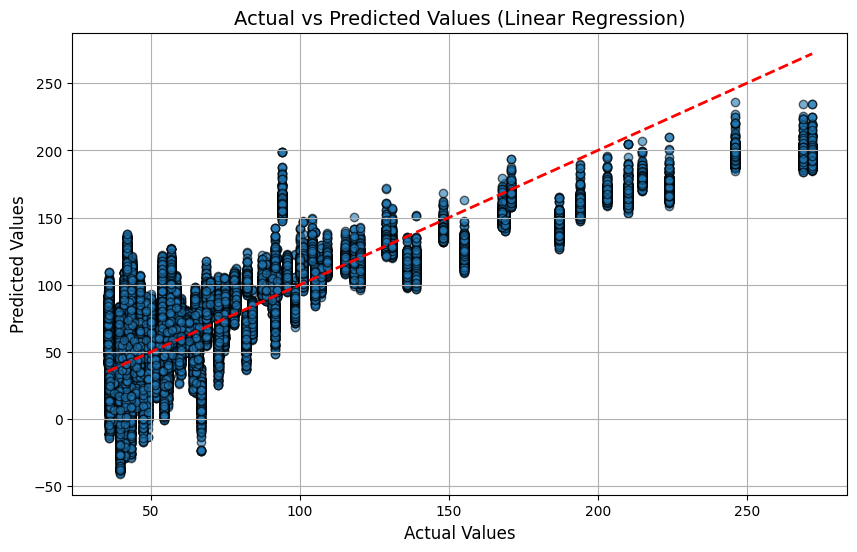

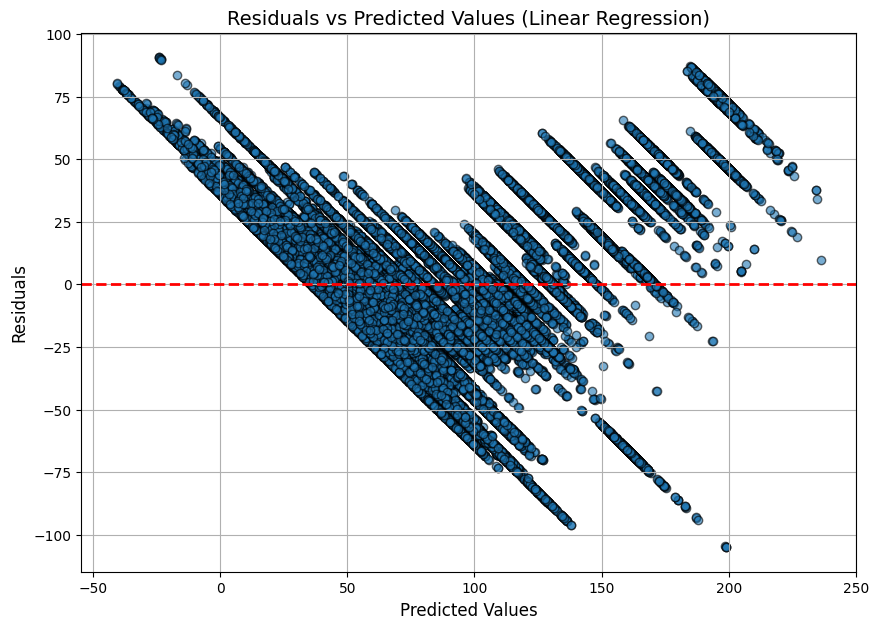

In [ ]:
# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (Linear Regression)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

# Compute residuals for Linear Regression
residuals = y_test - y_pred_optimized

# Plot residuals
plt.figure(figsize=(10, 7))
plt.scatter(y_pred_optimized, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs Predicted Values (Linear Regression)', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()

Step 2.4: Apply K4 Method

In [ ]:
# Ensure the 'Year' column is present in the dataset
if 'Year' not in merged_dataset.columns:
    merged_dataset['Year'] = pd.to_datetime(merged_dataset['Date']).dt.year

# Define the target column and feature columns
target_column = "Discharge(flow) in cubic meters per second (m3/s) "
feature_columns = merged_dataset.select_dtypes(include=['float64', 'int64']).columns.drop(
    ['Year', target_column], errors='ignore'
)

# Function for K4 method including MSE using Linear Regression
def k4_linear_regression(data, target_column, feature_columns):
    results = []
    years = sorted(data['Year'].unique())

    for i in range(0, len(years) - 3, 2):  # 2-year training, 2-year testing
        train_years = years[i:i+2]
        test_years = years[i+2:i+4]

        train_data = data[data['Year'].isin(train_years)]
        test_data = data[data['Year'].isin(test_years)]

        X_train = train_data[feature_columns]
        y_train = train_data[target_column]
        X_test = test_data[feature_columns]
        y_test = test_data[target_column]

        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)

        y_pred = lr_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({'Train Years': train_years, 'Test Years': test_years, 'MSE': mse, 'R²': r2})

    return results

# Apply the K4 method with MSE
k4_lr_results = k4_linear_regression(merged_dataset, target_column, feature_columns)

# Convert results to a DataFrame
k4_lr_results_df = pd.DataFrame(k4_lr_results)

print(k4_lr_results_df)

    Train Years    Test Years         MSE        R²
0  [2014, 2015]  [2016, 2017]  871.996804  0.677350
1  [2016, 2017]  [2018, 2019]  700.025156  0.740815
2  [2018, 2019]  [2020, 2021]  719.185680  0.733892
3  [2020, 2021]  [2022, 2023]  729.095896  0.730052


Step 2.5: Calculate the overall Performance Metrics from K4 Method

In [ ]:
# Function to calculate the overall MSE and R²
def average_lr_K4_results(k4_lr_results):
    lr_mse_values = [result['MSE'] for result in k4_lr_results]
    lr_r2_values = [result['R²'] for result in k4_lr_results]

    lr_average_mse = sum(lr_mse_values) / len(lr_mse_values)
    lr_average_r2 = sum(lr_r2_values) / len(lr_r2_values)

    return lr_average_mse, lr_average_r2

# Calculate overall metrics for Linear Regression results
lr_average_mse, lr_average_r2 = average_lr_K4_results(k4_lr_results)

# Print the overall results
print(f"Average Mean Squared Error (MSE): {lr_average_mse}")
print(f"Average R-Squared (R²): {lr_average_r2}")

Average Mean Squared Error (MSE): 755.0758841106405
Average R-Squared (R²): 0.720527219698254


Step 2.6: Visualising K4 Method Results

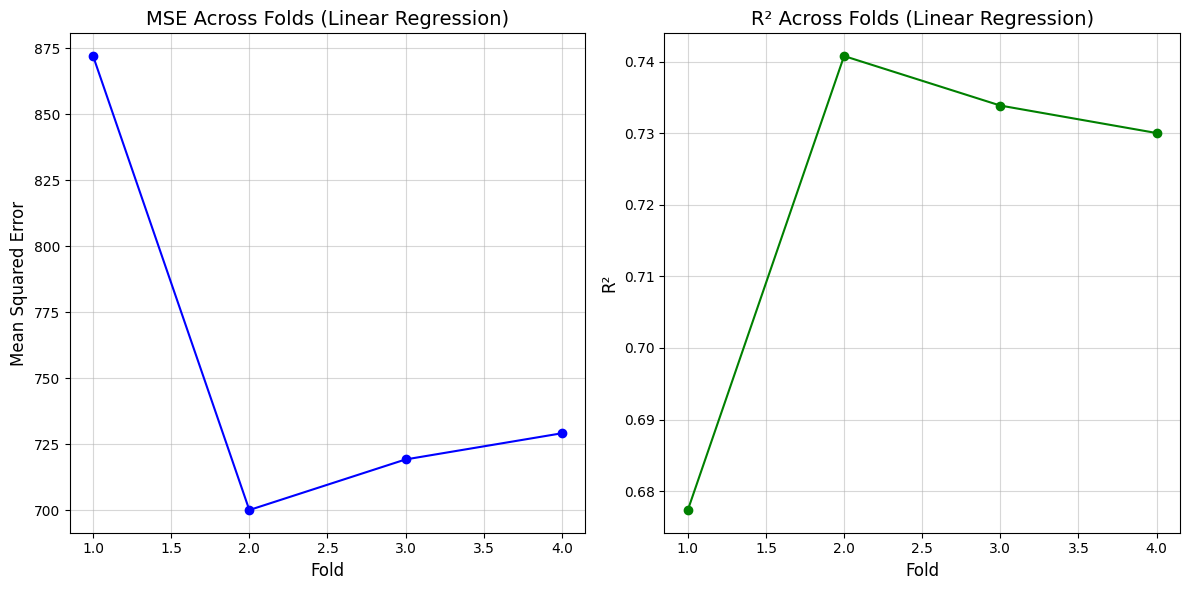

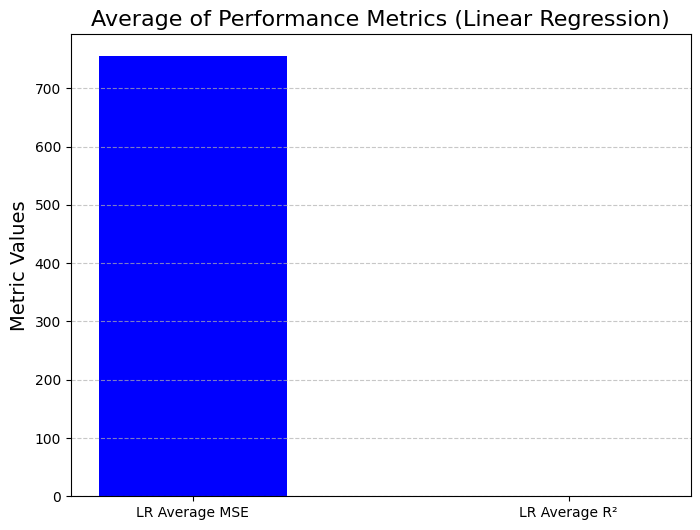

In [ ]:
# Prepare data for visualization
lr_mse_values = [result['MSE'] for result in k4_lr_results]
lr_r2_values = [result['R²'] for result in k4_lr_results]
folds = range(1, len(k4_lr_results) + 1)

# Visualizing MSE and R² for each fold
plt.figure(figsize=(12, 6))

# Plot MSE for each fold
plt.subplot(1, 2, 1)
plt.plot(folds, lr_mse_values, marker='o', linestyle='-', label='MSE', color='blue')
plt.title('MSE Across Folds (Linear Regression)', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(alpha=0.5)

# Plot R² for each fold
plt.subplot(1, 2, 2)
plt.plot(folds, lr_r2_values, marker='o', linestyle='-', label='R²', color='green')
plt.title('R² Across Folds (Linear Regression)', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.grid(alpha=0.5)

# Display the plots
plt.tight_layout()
plt.show()

# Overall MSE and R² as a bar chart
lr_average_metrics = ['LR Average MSE', 'LR Average R²']
lr_average_values = [lr_average_mse, lr_average_r2]

plt.figure(figsize=(8, 6))
plt.bar(lr_average_metrics, lr_average_values, color=['blue', 'green'], width=0.5)
plt.title("Average of Performance Metrics (Linear Regression)", fontsize=16)
plt.ylabel("Metric Values", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Step 2.7: Comparison of Performance Metric

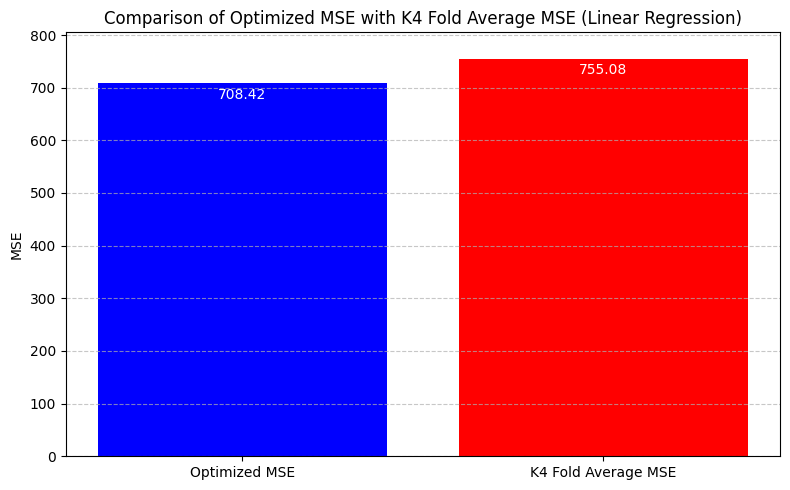

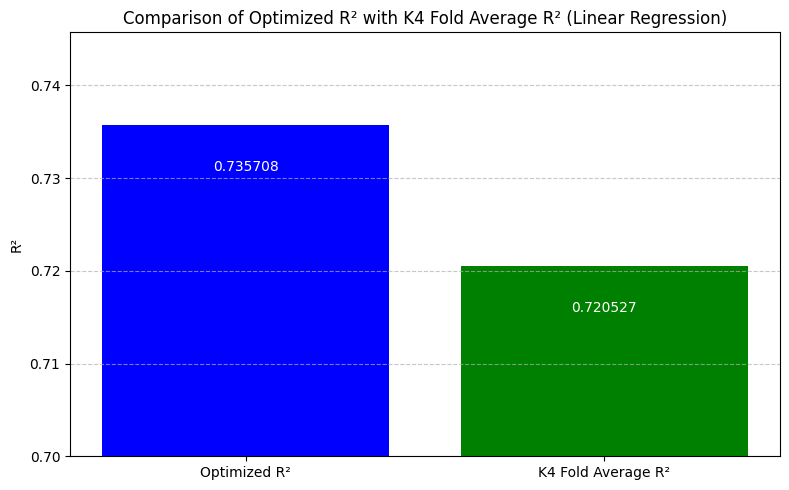

In [ ]:
# Visual comparison of Optimized MSE with K4 Fold Average MSE
plt.figure(figsize=(8, 5))
bars = plt.bar(['Optimized MSE', 'K4 Fold Average MSE'], [lr_mse_optimized, lr_average_mse], color=['blue', 'red'])
plt.title('Comparison of Optimized MSE with K4 Fold Average MSE (Linear Regression)')
plt.ylabel('MSE')
plt.ylim(0, max(lr_mse_optimized, lr_average_mse) + 50)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 30, f"{bar.get_height():.2f}", ha='center', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visual comparison of Optimized R² with K4 Fold Average R²
plt.figure(figsize=(8, 5))
bars = plt.bar(['Optimized R²', 'K4 Fold Average R²'], [lr_r2_optimized, lr_average_r2], color=['blue', 'green'])
plt.title('Comparison of Optimized R² with K4 Fold Average R² (Linear Regression)')
plt.ylabel('R²')
plt.ylim(0.7, max(lr_r2_optimized, lr_average_r2) + 0.01)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.005, f"{bar.get_height():.6f}", ha='center', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Random Forest Model


Step 3.1: Model Training and Performance Evaluation

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor with reduced estimators for optimization
rf_model_optimized = RandomForestRegressor(n_estimators=20, random_state=42)
rf_model_optimized.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = rf_model_optimized.predict(X_test)

# Evaluate the model's performance
rf_mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rf_r2_optimized = r2_score(y_test, y_pred_optimized)


# Display results
print('Random Forest Optimized MSE = ', rf_mse_optimized)
print('Random Forest Optimized R² = ', rf_r2_optimized)

Random Forest Optimized MSE =  4.817598739035445
Random Forest Optimized R² =  0.9982026777455147


Step 3.2: Visualising Results

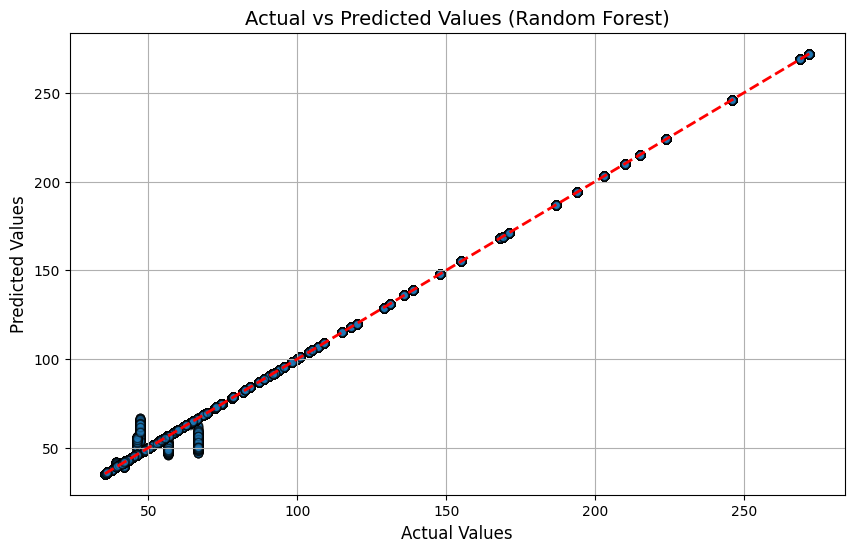

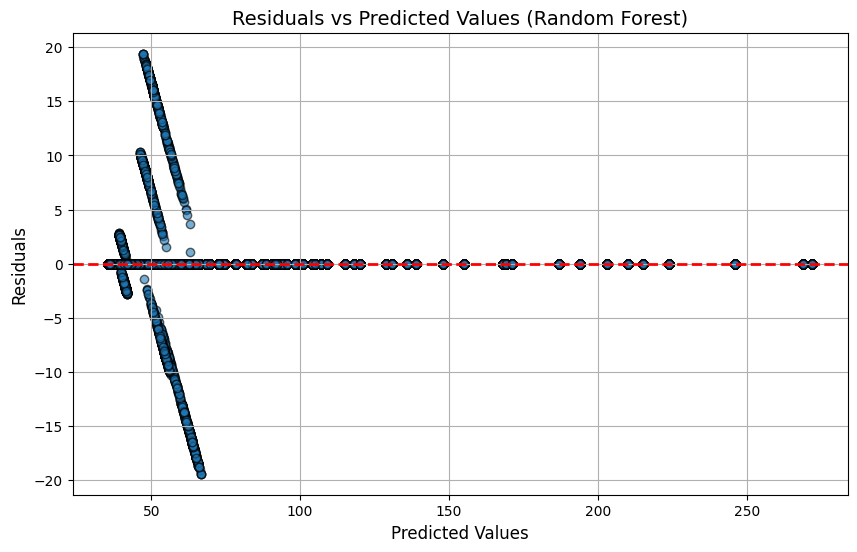

In [ ]:
# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

# Compute residuals for Random Forest
residuals = y_test - y_pred_optimized

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_optimized, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()


Step 3.3: Apply K4 Method

In [ ]:
# Ensure the 'Year' column is present in the dataset
if 'Year' not in merged_dataset.columns:
    merged_dataset['Year'] = pd.to_datetime(merged_dataset['Date']).dt.year

# Define the target column and feature columns
target_column = "Discharge(flow) in cubic meters per second (m3/s) "
feature_columns = merged_dataset.select_dtypes(include=['float64', 'int64']).columns.drop(
    ['Year', target_column], errors='ignore'
)

# Function for K4 method including MSE
def k4_rf_results(data, target_column, feature_columns):
    results = []
    years = sorted(data['Year'].unique())

    for i in range(0, len(years) - 3, 2):  # 2-year training, 2-year testing
        train_years = years[i:i+2]
        test_years = years[i+2:i+4]

        train_data = data[data['Year'].isin(train_years)]
        test_data = data[data['Year'].isin(test_years)]

        X_train = train_data[feature_columns]
        y_train = train_data[target_column]
        X_test = test_data[feature_columns]
        y_test = test_data[target_column]

        rf_model = RandomForestRegressor(n_estimators=20, random_state=42)
        rf_model.fit(X_train, y_train)

        y_pred = rf_model.predict(X_test)
        rf_mse = mean_squared_error(y_test, y_pred)
        rf_r2 = r2_score(y_test, y_pred)

        results.append({'Train Years': train_years, 'Test Years': test_years, 'MSE': rf_mse, 'R²': rf_r2})

    return results

# Apply the K4 method with MSE
k4_rf_results = k4_rf_results(merged_dataset, target_column, feature_columns)

# Convert results to a DataFrame
k4_rf_results_df = pd.DataFrame(k4_rf_results)

print(k4_rf_results_df)



    Train Years    Test Years       MSE        R²
0  [2014, 2015]  [2016, 2017]  3.955835  0.998536
1  [2016, 2017]  [2018, 2019]  4.112339  0.998477
2  [2018, 2019]  [2020, 2021]  2.549675  0.999057
3  [2020, 2021]  [2022, 2023]  5.331736  0.998026


Step 3.4: Calculate the overall Performance Metrics from K4 Method

In [ ]:
# Function to calculate the overall MSE and R²
def average_rf_k4_results(k4_rf_results):
    rf_mse_values = [result['MSE'] for result in k4_rf_results]
    rf_r2_values = [result['R²'] for result in k4_rf_results]

    average_rf_mse = sum(rf_mse_values) / len(rf_mse_values)
    average_rf_r2 = sum(rf_r2_values) / len(rf_r2_values)

    return average_rf_mse, average_rf_r2

# Calculate overall metrics
average_rf_mse, average_rf_r2 = average_rf_k4_results(k4_rf_results)

# Print the overall results
print(f"Average Random Forest Mean Squared Error (MSE): {average_rf_mse}")
print(f"Average Random Forest R-Squared (R²): {average_rf_r2}")


Average Random Forest Mean Squared Error (MSE): 3.9873963737699154
Average Random Forest R-Squared (R²): 0.9985240506862156


Step 3.5: Visualising K4 Method Results

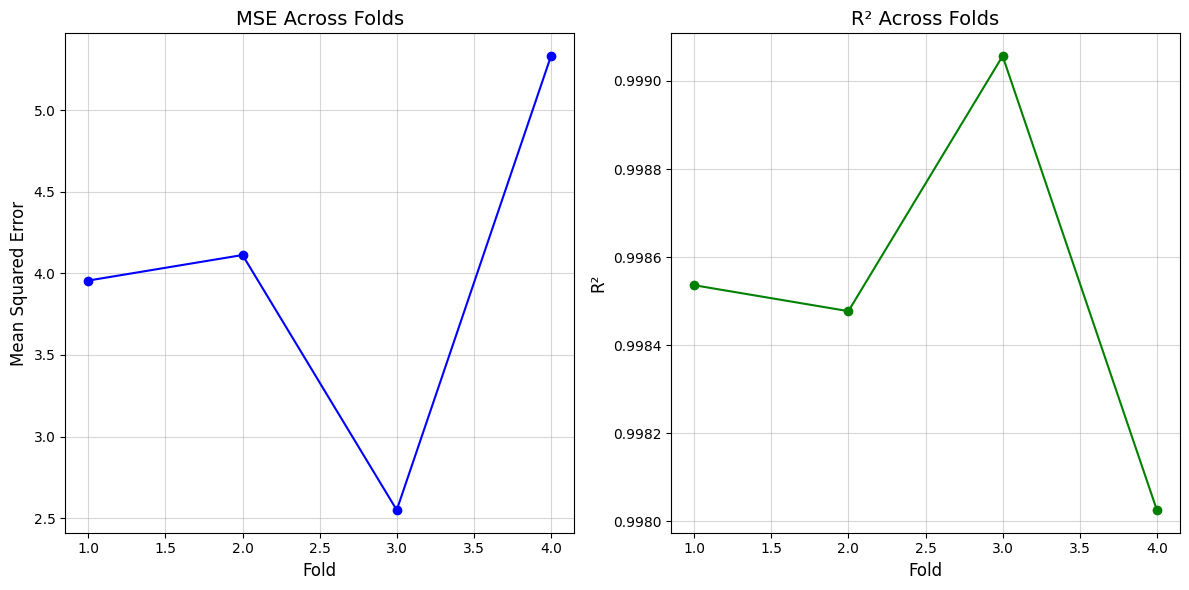

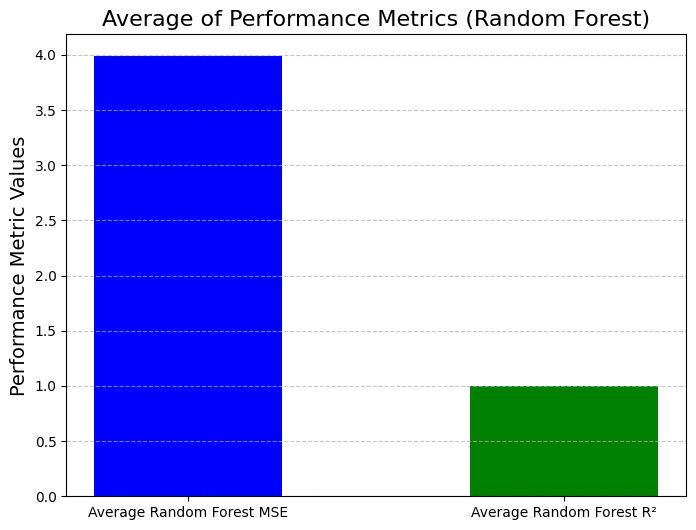

In [ ]:
# Prepare data for visualization
rf_mse_values = [result['MSE'] for result in k4_rf_results]
rf_r2_values = [result['R²'] for result in k4_rf_results]
folds = range(1, len(k4_rf_results) + 1)

# Visualizing MSE and R² for each fold
plt.figure(figsize=(12, 6))

# Plot MSE for each fold
plt.subplot(1, 2, 1)
plt.plot(folds, rf_mse_values, marker='o', linestyle='-', label='MSE', color='blue')
plt.title('MSE Across Folds', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(alpha=0.5)

# Plot R² for each fold
plt.subplot(1, 2, 2)
plt.plot(folds, rf_r2_values, marker='o', linestyle='-', label='R²', color='green')
plt.title('R² Across Folds', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.grid(alpha=0.5)

# Display the plots
plt.tight_layout()
plt.show()

# Overall MSE and R² as a bar chart
average_rf_metrics = ['Average Random Forest MSE', 'Average Random Forest R²']
average_rf_values = [average_rf_mse, average_rf_r2]

plt.figure(figsize=(8, 6))
plt.bar(average_rf_metrics, average_rf_values, color=['blue', 'green'], width=0.5)
plt.title("Average of Performance Metrics (Random Forest)", fontsize=16)
plt.ylabel("Performance Metric Values", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Step 3.6: Comparison of Performance Metric

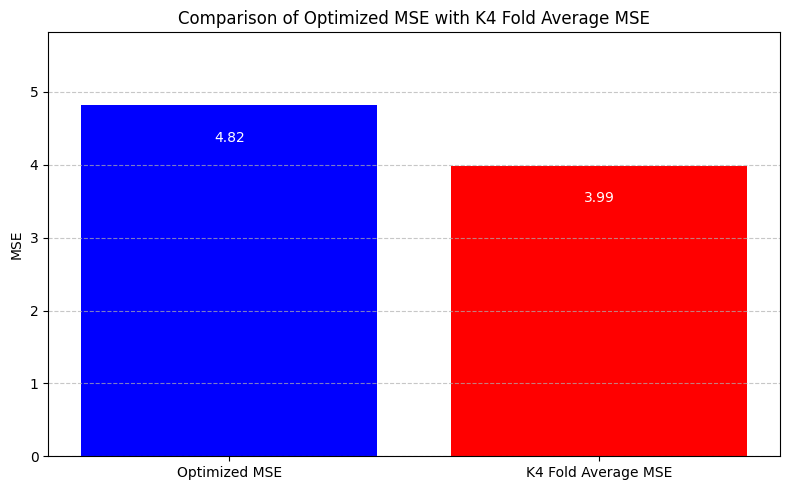

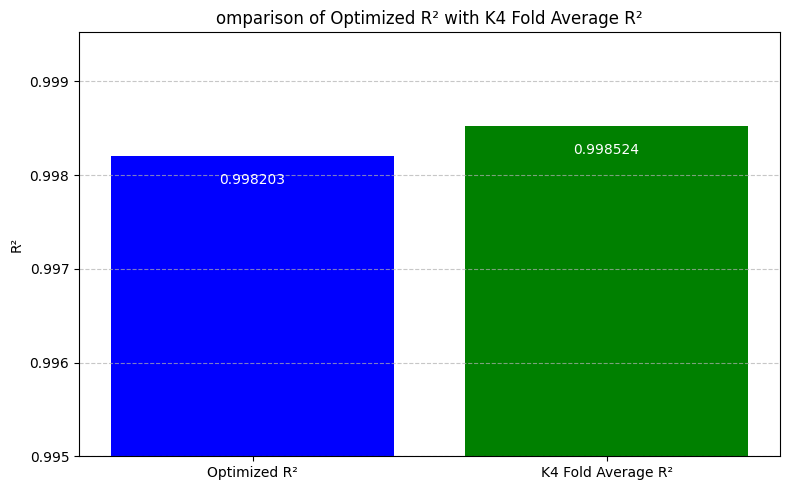

In [ ]:
# Visual comparison for MSE with updated labels
plt.figure(figsize=(8, 5))

bars = plt.bar(['Optimized MSE', 'K4 Fold Average MSE'], [rf_mse_optimized, average_rf_mse], color=['blue', 'red'])
plt.title('Comparison of Optimized MSE with K4 Fold Average MSE')
plt.ylabel('MSE')
plt.ylim(0, max(rf_mse_optimized, average_rf_mse) + 1)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.5, f"{bar.get_height():.2f}", ha='center', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visual comparison for R² with updated labels
plt.figure(figsize=(8, 5))
bars = plt.bar(['Optimized R²', 'K4 Fold Average R²'], [rf_r2_optimized, average_rf_r2], color=['blue', 'green'])
plt.title('omparison of Optimized R² with K4 Fold Average R²')
plt.ylabel('R²')
plt.ylim(0.995, max(rf_r2_optimized, average_rf_r2) + 0.001)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.0003, f"{bar.get_height():.6f}", ha='center', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4. Model Comparison

Step 4.1: Linear Regression vs Random Forest (Visualization)

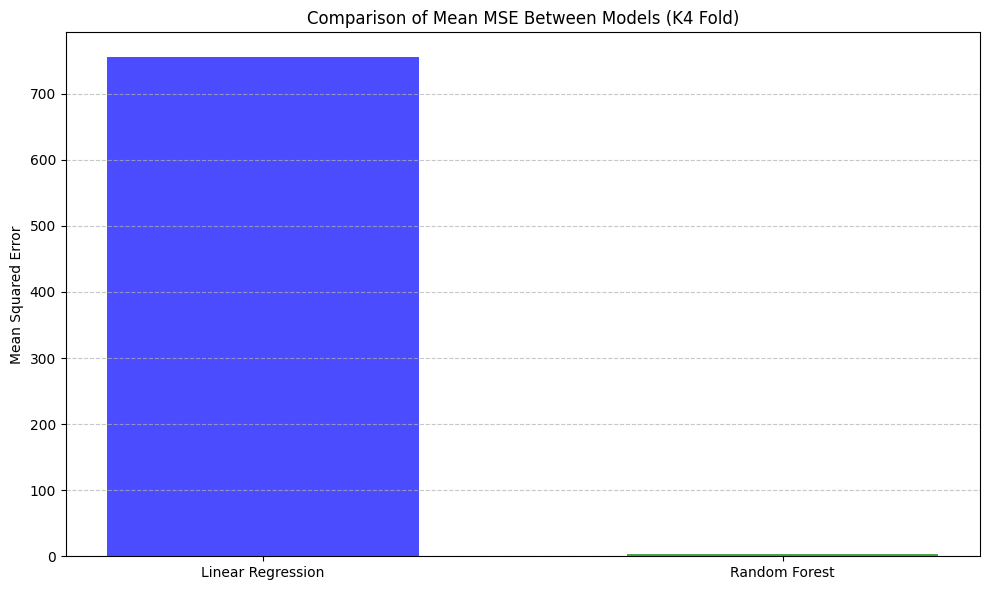

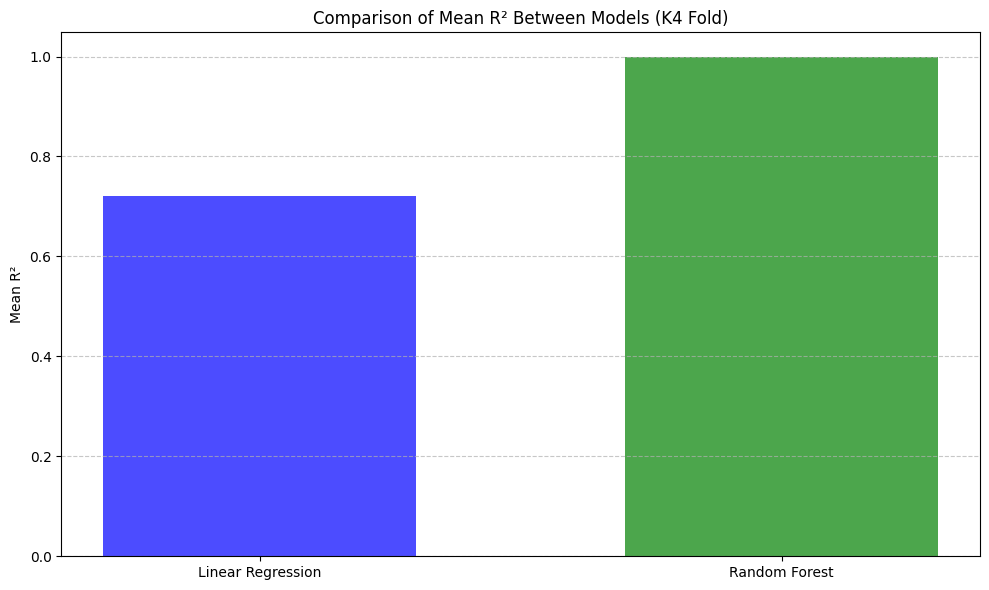

In [ ]:
# Define models and their mean metrics
models = ['Linear Regression', 'Random Forest']
mse_means = [lr_average_mse, average_rf_mse]
r2_means = [lr_average_r2, average_rf_r2]


# Plot comparison for MSE
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
plt.bar(x, mse_means, color=['blue', 'green'], alpha=0.7, width=0.6)
plt.xticks(x, models)
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean MSE Between Models (K4 Fold)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot comparison for R²
plt.figure(figsize=(10, 6))
plt.bar(x, r2_means, color=['blue', 'green'], alpha=0.7, width=0.6)
plt.xticks(x, models)
plt.ylabel('Mean R²')
plt.title('Comparison of Mean R² Between Models (K4 Fold)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Step 4.2: Justfication the use of Random Forest Model

give justification :::::

### 5. Predicting Water Consumption without Real Time Data


In [ ]:
#Please Write code to predict data without using real time data

# **Model Development with Real Time Data**

### 6. Feature Engineering

(Give justification of why we using it)


Step 6.1: Preprocessing: Ensure date compatibility and merge datasets

In [ ]:
# Convert 'Date' columns to datetime format
water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'])
historical_data['Date'] = pd.to_datetime(historical_data['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
real_time_data['Date'] = pd.to_datetime(real_time_data['Date'])

# Drop duplicate or irrelevant columns before merging
water_quality_data = water_quality_data.drop(columns=['Year', 'Day'], errors='ignore')
historical_data = historical_data.drop(columns=['Year', 'Day'], errors='ignore')
weather_data = weather_data.drop(columns=['Year', 'Day'], errors='ignore')
real_time_data = real_time_data.drop(columns=['Year', 'Day'], errors='ignore')

# Merge datasets based on 'Day_of_Year'
real_time_merged_dataset = (water_quality_data
    .merge(historical_data, on='Day_of_Year', how='inner', suffixes=('_water', '_historical'))
    .merge(weather_data, on='Day_of_Year', how='inner', suffixes=('', '_weather'))
    .merge(real_time_data, on='Day_of_Year', how='inner', suffixes=('', '_realtime'))
)

# Display the first few rows of the merged dataset
print("Real Time Merged Dataset:")
print(real_time_merged_dataset.head())


Real Time Merged Dataset:
  Date_water  IRON DISSOLVED  OXYGEN DISSOLVED (FIELD METER)  PH (FIELD)  \
0 2014-01-20            0.06                           13.56        7.98   
1 2014-01-20            0.06                           13.56        7.98   
2 2014-01-20            0.06                           13.56        7.98   
3 2014-01-20            0.06                           13.56        7.98   
4 2014-01-20            0.06                           13.56        7.98   

   TEMPERATURE WATER  TURBIDITY  ZINC DISSOLVED  Day_of_Year Date_historical  \
0              -0.03        3.1            1.43           20      2014-01-20   
1              -0.03        3.1            1.43           20      2014-01-20   
2              -0.03        3.1            1.43           20      2014-01-20   
3              -0.03        3.1            1.43           20      2014-01-20   
4              -0.03        3.1            1.43           20      2014-01-20   

   Discharge(flow) in cubic meters p

Step 6.2: Add New Features

In [ ]:
# Add Rolling Averages
real_time_merged_dataset['Rainfall_7d_avg'] =real_time_merged_dataset['Total Rain (mm)'].rolling(window=7).mean()
real_time_merged_dataset['Temp_7d_avg'] = real_time_merged_dataset['Mean Temp (°C)'].rolling(window=7).mean()
real_time_merged_dataset['Water_Level_7d_avg'] = real_time_merged_dataset['Water Level Daily Mean Value (m)'].rolling(window=7).mean()
real_time_merged_dataset['Discharge_7d_avg'] = real_time_merged_dataset['Discharge Daily Mean Value (m3/s)'].rolling(window=7).mean()

# Add Lagged Features
real_time_merged_dataset['Rainfall_3d_lag'] = real_time_merged_dataset['Total Rain (mm)'].shift(3)
real_time_merged_dataset['Temp_3d_lag'] = real_time_merged_dataset['Mean Temp (°C)'].shift(3)
real_time_merged_dataset['Water_Level_3d_lag'] = real_time_merged_dataset['Water Level Daily Mean Value (m)'].shift(3)
real_time_merged_dataset['Discharge_3d_lag'] = real_time_merged_dataset['Discharge Daily Mean Value (m3/s)'].shift(3)

# Add Interaction Features
real_time_merged_dataset['Rainfall_Temp_Interaction'] = real_time_merged_dataset['Total Rain (mm)'] * real_time_merged_dataset['Mean Temp (°C)']
real_time_merged_dataset['Discharge_Water_Level_Interaction'] = real_time_merged_dataset['Discharge Daily Mean Value (m3/s)'] * real_time_merged_dataset['Water Level Daily Mean Value (m)']

# Drop rows with NaN values resulting from rolling and lagged feature calculations
real_time_merged_dataset.dropna(subset=['Rainfall_7d_avg', 'Temp_7d_avg', 'Water_Level_7d_avg', 'Discharge_7d_avg',
                           'Rainfall_3d_lag', 'Temp_3d_lag', 'Water_Level_3d_lag', 'Discharge_3d_lag'], inplace=True)

# Display the updated dataset
print("Updated Real Time Merged Data with New Features:")
print(real_time_merged_dataset.head())

Updated Real Time Merged Data with New Features:
   Date_water  IRON DISSOLVED  OXYGEN DISSOLVED (FIELD METER)  PH (FIELD)  \
6  2014-01-20            0.06                           13.56        7.98   
7  2014-01-20            0.06                           13.56        7.98   
8  2014-01-20            0.06                           13.56        7.98   
9  2014-01-20            0.06                           13.56        7.98   
10 2014-01-20            0.06                           13.56        7.98   

    TEMPERATURE WATER  TURBIDITY  ZINC DISSOLVED  Day_of_Year Date_historical  \
6               -0.03        3.1            1.43           20      2014-01-20   
7               -0.03        3.1            1.43           20      2014-01-20   
8               -0.03        3.1            1.43           20      2014-01-20   
9               -0.03        3.1            1.43           20      2014-01-20   
10              -0.03        3.1            1.43           20      2014-01-20   

 

Step 6.3: Visualize New Features

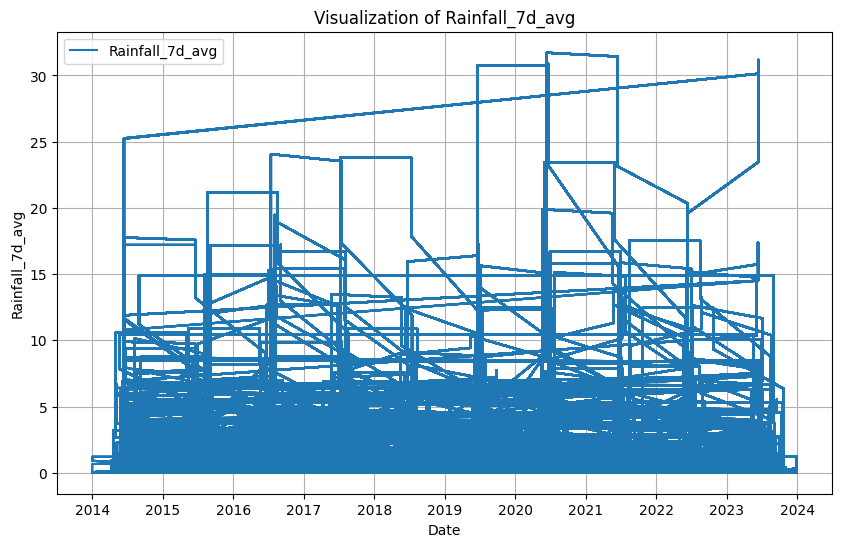

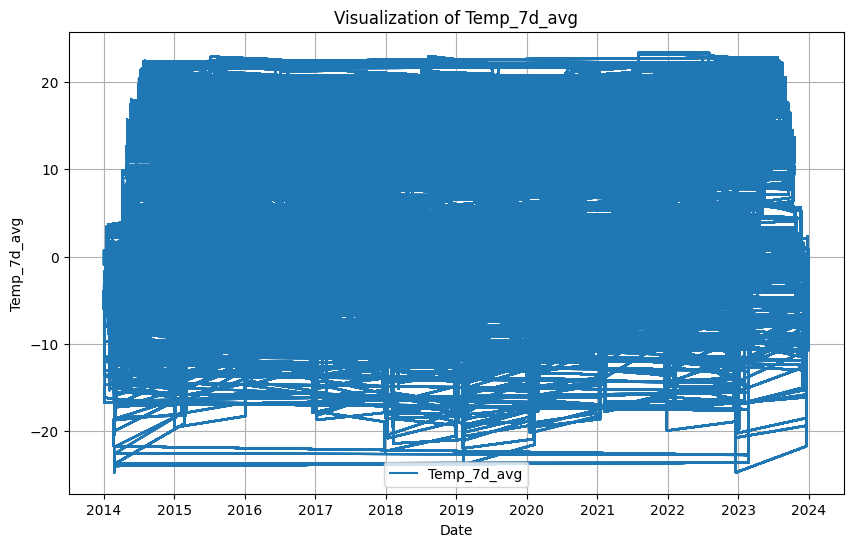

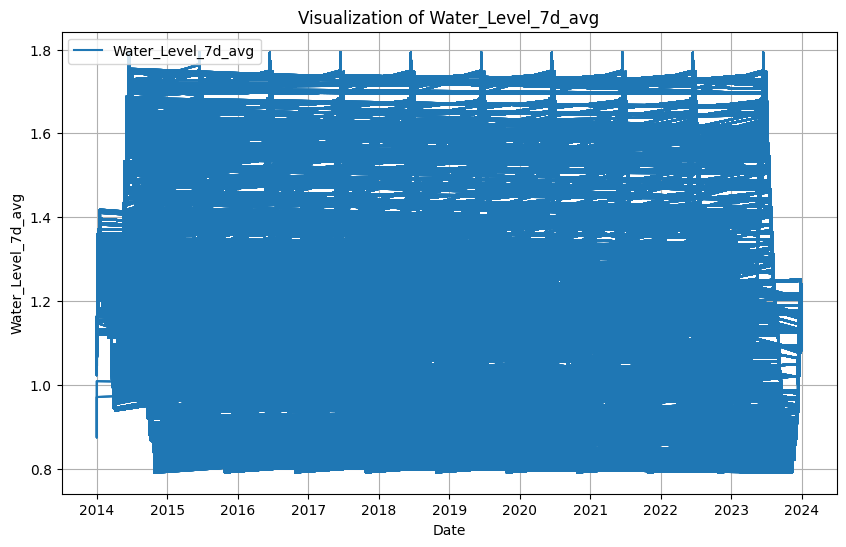

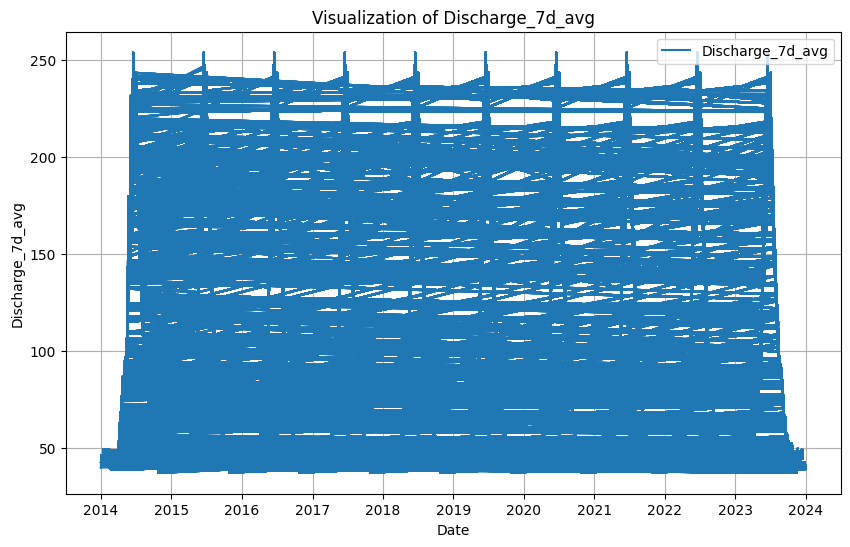

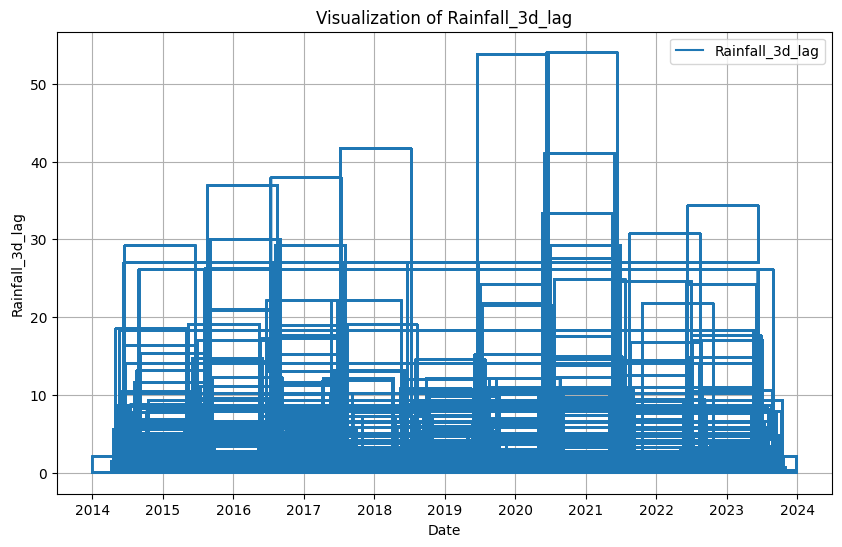

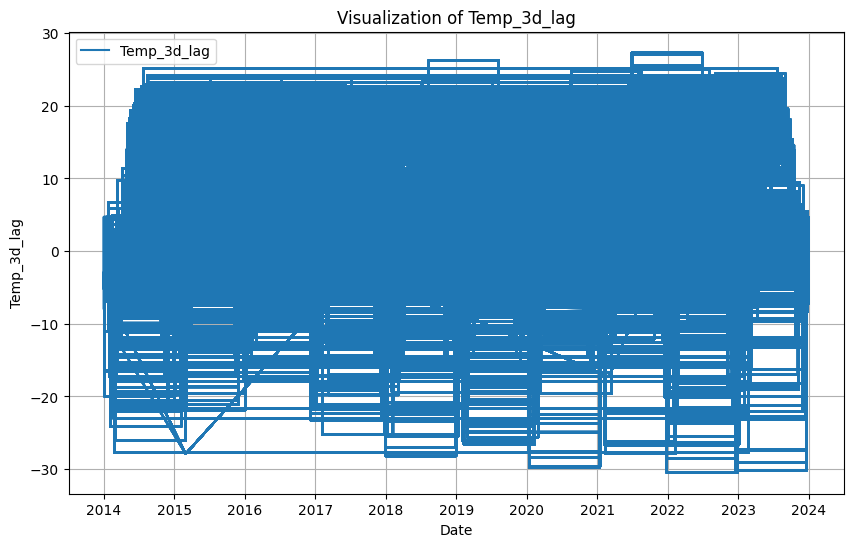

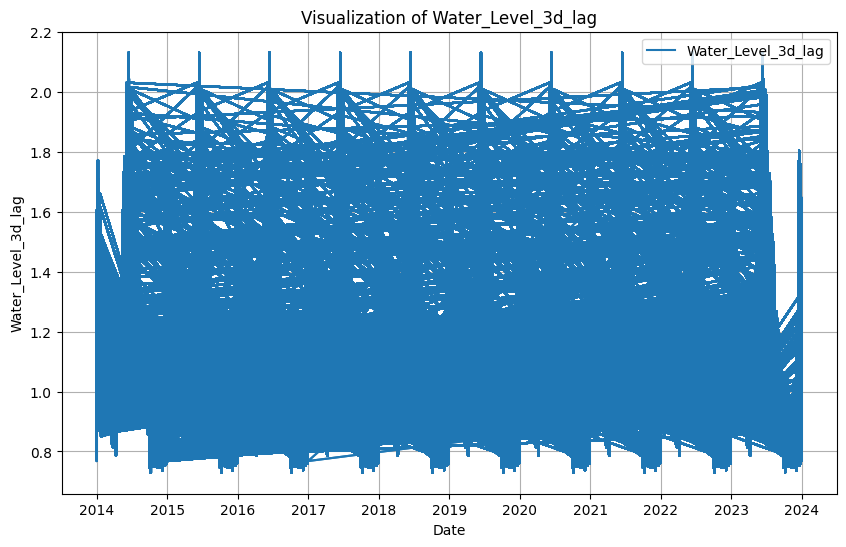

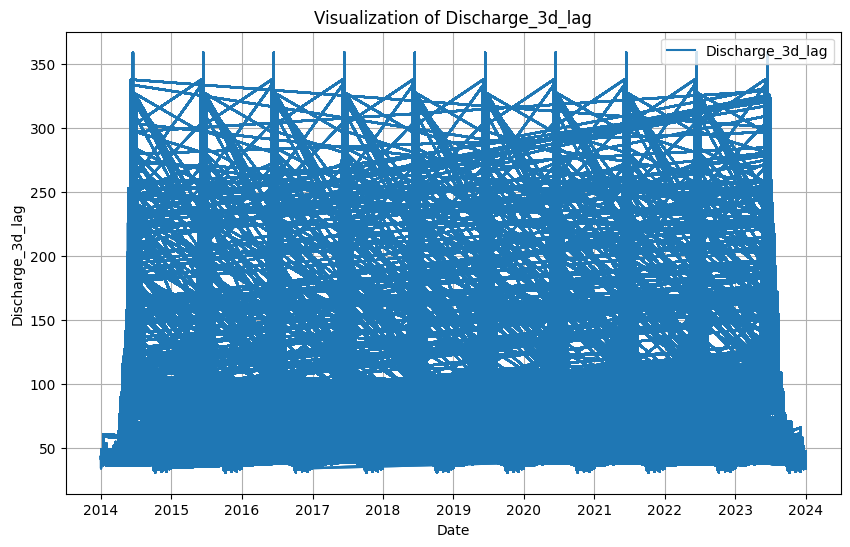

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000  # Adjust the chunk size for large plots

# Visualization of new features
features_to_plot = [
    'Rainfall_7d_avg',
    'Temp_7d_avg',
    'Water_Level_7d_avg',
    'Discharge_7d_avg',
    'Rainfall_3d_lag',
    'Temp_3d_lag',
    'Water_Level_3d_lag',
    'Discharge_3d_lag'
]

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(real_time_merged_dataset['Date'], real_time_merged_dataset[feature], label=feature)
    plt.title(f"Visualization of {feature}")
    plt.xlabel("Date")
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()

Step 6.4: Display Heatmap

(Justify its use)

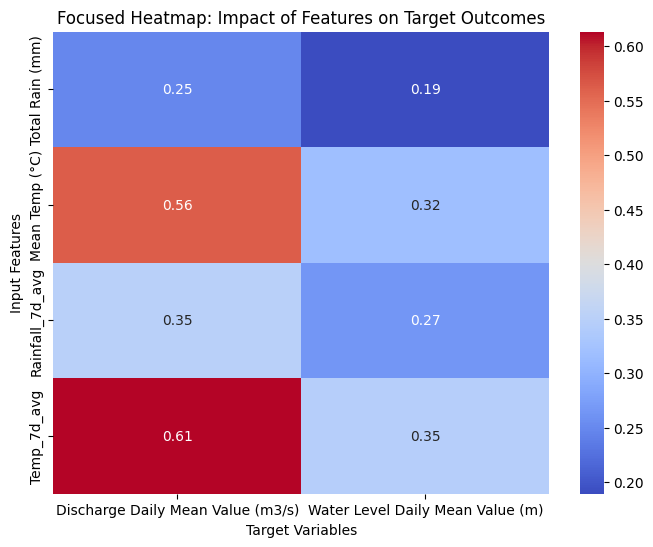

In [ ]:
# Define features and targets
input_features = [
    'Total Rain (mm)', 'Mean Temp (°C)', 'Rainfall_7d_avg', 'Temp_7d_avg'
]
target_features = ['Discharge Daily Mean Value (m3/s)', 'Water Level Daily Mean Value (m)']

# Combine inputs and targets for correlation
selected_features = input_features + target_features
filtered_data = real_time_merged_dataset[selected_features]

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Extract correlations of input features with targets
focused_correlation = correlation_matrix[target_features].loc[input_features]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(focused_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Focused Heatmap: Impact of Features on Target Outcomes')
plt.xlabel('Target Variables')
plt.ylabel('Input Features')
plt.show()

### 7. Model Development and Performance Evaluation

Step 7.1: Training both Models and Evaluating Performance

In [ ]:
from sklearn.model_selection import train_test_split

# Define target variable (e.g., Discharge) and input features
target = 'Discharge Daily Mean Value (m3/s)'
features = [
    'Total Rain (mm)', 'Mean Temp (°C)', 'Rainfall_7d_avg', 'Temp_7d_avg',
    'Rainfall_3d_lag', 'Temp_3d_lag', 'Water_Level_7d_avg', 'Discharge_7d_avg',
    'Rainfall_Temp_Interaction', 'Discharge_Water_Level_Interaction'
]

# Drop rows with missing values in the target or features
model_data = real_time_merged_dataset[features + [target]].dropna()

# Split the data into training (80%) and testing (20%) sets
X = model_data[features]
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model for Discharge Prediction
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest model for Discharge Prediction
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate performance for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display evaluation results
results = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_rf],
    'R2 Score': [r2_lr, r2_rf]
}
results_df = pd.DataFrame(results)
print(results_df)

Step 7.2: Visualising Results

Step 7.3: Apply K4 Method

Step 7.4: Calculate the overall Performance Metrics from K4 Method

Step 7.5: Visualising K4 Method Results

Step 7.6: Comparison of both Model Performance Metric

(Justify Using Random Forest Model)

# **Model Comparison: Real Time Data vs Historical Data**

Step 8.1: Comparison Table Creation

Step 8.2: Visualising Results

# **Future Consumption Prediction**

Step 9.1: Predict Consumption Using Real Time Data

(Give Justification)

# **Conclusion**

(Write here)